### Cluster Analysis of London High Streets

In [87]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

#### Get the London Whythawk Dataset read in

In [88]:
os.getcwd() 

'/home/jovyan/work/Dissertation'

In [89]:
import glob

path = 'London Whythawk 2021' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [90]:
all_files

['London Whythawk 2021/2021-03-E09000001-city-of-london-location-report.csv',
 'London Whythawk 2021/2021-03-E09000002-barking-and-dagenham-location-report.csv',
 'London Whythawk 2021/2021-03-E09000003-barnet-location-report.csv',
 'London Whythawk 2021/2021-03-E09000004-bexley-location-report.csv',
 'London Whythawk 2021/2021-03-E09000005-brent-location-report.csv',
 'London Whythawk 2021/2021-03-E09000006-bromley-location-report.csv',
 'London Whythawk 2021/2021-03-E09000007-camden-location-report.csv',
 'London Whythawk 2021/2021-03-E09000008-croydon-location-report.csv',
 'London Whythawk 2021/2021-03-E09000009-ealing-location-report.csv',
 'London Whythawk 2021/2021-03-E09000010-enfield-location-report.csv',
 'London Whythawk 2021/2021-03-E09000011-greenwich-location-report.csv',
 'London Whythawk 2021/2021-03-E09000012-hackney-location-report.csv',
 'London Whythawk 2021/2021-03-E09000013-hammersmith-and-fulham-location-report.csv',
 'London Whythawk 2021/2021-03-E09000014-harin

In [91]:
frame

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,valuation_date,revaluation_year,period,rates_expected,name,rates_paid,status,status_date,status_duration,ratepayers_published
0,00000 664241129,E09000001,City of London,Inner London - West,12865144000,SERVER ROOM 18TH FLR AT 100,BISHOPSGATE,LONDON,EC2N 4AG,Offices (Inc Computer Centres),...,2020-06-01 00:00:00+00:00,2017,2021-03,2484.300,NaN,NaN,1.0,2020-06-01,NaN,True
1,0000000122214001,E09000001,City of London,Inner London - West,12485709000,40,CHANCERY LANE,LONDON,WC2A 1JA,Offices (Inc Computer Centres),...,2018-08-28 00:00:00+00:00,2017,2021-03,2142400.000,NaN,NaN,1.0,2018-08-28,NaN,True
2,00000010140044,E09000001,City of London,Inner London - West,1829216000,(& PTS NEW ST & VICTORIA AVE) POLICE STATION (...,BISHOPSGATE,LONDON,EC2M 4NQ,Police Stations,...,2019-11-28 00:00:00+00:00,2017,2021-03,577200.000,CITY OF LONDON POLICE FINANCIALSERVICES,288850.0,1.0,1999-07-22,7924.0,True
3,00000010510023,E09000001,City of London,Inner London - West,7372619000,PT 1ST FLR (NORTH & SOUTH EAST) 11-12,OLD JEWRY,LONDON,EC2R 8DU,Offices (Inc Computer Centres),...,2017-04-01 00:00:00+00:00,2017,2021-03,111800.000,TOM JAMES UK LTD,113950.0,1.0,2010-07-03,3925.0,True
4,00000010600018,E09000001,City of London,Inner London - West,29363052,POLICE STATION,SNOW HILL,LONDON,EC1A 2DH,Police Stations,...,2019-05-28 00:00:00+00:00,2017,2021-03,244400.000,CITY OF LONDON POLICE FINANCIALSERVICES,132500.0,1.0,2002-04-01,6940.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329028,NaN,E09000033,Westminster,Inner London - West,12938759000,1ST FLR REAR EXL MIDDLE AT BRIDGE PLACE HOUSE 9,BELGRAVE ROAD,LONDON,SW1V 1QB,Offices (Inc Computer Centres),...,2018-11-03 00:00:00+00:00,2017,2021-03,3443.100,NaN,NaN,1.0,2018-11-03,NaN,False
329029,NaN,E09000033,Westminster,Inner London - West,12502040000,1ST FLR TEA POINT 49,GROSVENOR STREET,LONDON,W1K 3HP,Offices (Inc Computer Centres),...,2018-12-01 00:00:00+00:00,2017,2021-03,848.300,NaN,NaN,1.0,2018-12-01,NaN,False
329030,NaN,E09000033,Westminster,Inner London - West,12502046000,2ND FLR TEA POINT 49,GROSVENOR STREET,LONDON,W1K 3HP,Offices (Inc Computer Centres),...,2018-12-01 00:00:00+00:00,2017,2021-03,910.675,NaN,NaN,1.0,2018-12-01,NaN,False
329031,NaN,E09000033,Westminster,Inner London - West,12502058000,4TH FLR TEA POINT 49,GROSVENOR STREET,LONDON,W1K 3HP,Offices (Inc Computer Centres),...,2018-12-01 00:00:00+00:00,2017,2021-03,823.350,NaN,NaN,1.0,2018-12-01,NaN,False


In [92]:
frame['rates_authority'] = frame['rates_authority'].astype('category')

In [93]:
list(frame['rates_authority'].unique())

['City of London',
 'Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [94]:
OS1 =  pd.read_csv('OS AddressBase Plus/TQ2080.csv', low_memory=False)

In [95]:
OS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141900 entries, 0 to 141899
Data columns (total 77 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   UPRN                             141900 non-null  float64
 1   UDPRN                            91267 non-null   float64
 2   CHANGE_TYPE                      141900 non-null  object 
 3   STATE                            95838 non-null   float64
 4   STATE_DATE                       95838 non-null   object 
 5   CLASS                            141900 non-null  object 
 6   PARENT_UPRN                      77254 non-null   float64
 7   X_COORDINATE                     141900 non-null  float64
 8   Y_COORDINATE                     141900 non-null  float64
 9   LATITUDE                         141900 non-null  float64
 10  LONGITUDE                        141900 non-null  float64
 11  RPC                              141900 non-null  int64  
 12  LO

In [96]:
OS1

,UPRN,UDPRN,CHANGE_TYPE,STATE,STATE_DATE,CLASS,PARENT_UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,...,DELIVERY_POINT_SUFFIX,ADDRESSBASE_POSTAL,PO_BOX_NUMBER,WARD_CODE,PARISH_CODE,RM_START_DATE,MULTI_OCC_COUNT,VOA_NDR_P_DESC_CODE,VOA_NDR_SCAT_CODE,ALT_LANGUAGE
0,1.003355e+10,NaN,I,2.0,27/04/2003,CU11,NaN,524796.0,182159.0,51.524567,...,NaN,N,NaN,E05000635,NaN,NaN,0,MT2,228.0,NaN
1,2.170388e+08,NaN,I,NaN,NaN,RD06,2.170388e+08,524405.0,180008.0,51.505322,...,NaN,L,NaN,E05009397,NaN,NaN,0,NaN,NaN,NaN
2,1.003359e+10,NaN,I,2.0,09/11/2006,CO01,1.003359e+10,524571.0,182324.0,51.526100,...,NaN,L,NaN,E05000635,NaN,NaN,0,CO,203.0,NaN
3,1.009204e+10,52824879.0,I,NaN,NaN,OR04,3.403961e+07,523346.0,180029.0,51.505743,...,2R,D,NaN,E05000263,NaN,02/08/2012,0,NaN,NaN,NaN
4,1.009204e+10,17739669.0,I,NaN,NaN,OR04,2.020463e+08,524591.0,183380.0,51.535586,...,2N,D,NaN,E05000098,NaN,19/03/2012,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141895,2.021346e+08,NaN,I,2.0,10/08/2007,RD06,1.009106e+10,523416.0,183043.0,51.532815,...,NaN,C,NaN,E05000098,NaN,NaN,0,NaN,NaN,NaN
141896,2.021111e+08,17820657.0,I,2.0,10/08/2007,RD06,NaN,521094.0,183881.0,51.540849,...,3H,D,NaN,E05000091,NaN,19/03/2012,0,NaN,NaN,NaN
141897,2.020463e+08,NaN,I,2.0,10/08/2007,RD06,1.009106e+10,524423.0,183622.0,51.537798,...,NaN,C,NaN,E05000098,NaN,NaN,0,NaN,NaN,NaN
141898,1.000230e+11,25891517.0,I,2.0,19/03/2001,RD04,NaN,524982.0,182530.0,51.527861,...,1S,D,NaN,E05000635,NaN,19/03/2012,0,NaN,NaN,NaN


In [97]:
OS1 = OS1[['VOA_CT_RECORD', 'VOA_NDR_RECORD', 'X_COORDINATE', 'Y_COORDINATE', 'ADMINISTRATIVE_AREA']]

In [98]:
OS2 = pd.read_csv('OS AddressBase Plus/TQ2085.csv', low_memory=False)

In [99]:
OS2 = OS2[['VOA_CT_RECORD', 'VOA_NDR_RECORD', 'X_COORDINATE', 'Y_COORDINATE', 'ADMINISTRATIVE_AREA']]

In [100]:
OS3 = pd.read_csv('OS AddressBase Plus/TQ2580.csv', low_memory=False)

In [101]:
OS3 = OS3[['VOA_CT_RECORD', 'VOA_NDR_RECORD', 'X_COORDINATE', 'Y_COORDINATE', 'ADMINISTRATIVE_AREA']]

In [102]:
OS4 = pd.read_csv('OS AddressBase Plus/TQ2585.csv', low_memory=False)

In [103]:
OS4 = OS4[['VOA_CT_RECORD', 'VOA_NDR_RECORD', 'X_COORDINATE', 'Y_COORDINATE', 'ADMINISTRATIVE_AREA']] 

In [104]:
OS5 = pd.read_csv('OS AddressBase Plus/TQ3080.csv', low_memory=False)

In [105]:
OS5 = OS5[['VOA_CT_RECORD', 'VOA_NDR_RECORD', 'X_COORDINATE', 'Y_COORDINATE', 'ADMINISTRATIVE_AREA']]

In [115]:
ABP = OS1.append(OS2)
ABP = ABP.append(OS3)
ABP = ABP.append(OS4)
ABP = ABP.append(OS5)

In [118]:
ABP['ADMINISTRATIVE_AREA'].unique()

array(['CITY OF WESTMINSTER', 'KENSINGTON AND CHELSEA',
       'HAMMERSMITH AND FULHAM', 'BRENT', 'EALING', 'CAMDEN', 'BARNET',
       'ISLINGTON', 'HARINGEY', 'HACKNEY', 'TOWER HAMLETS',
       'CITY OF LONDON', 'SOUTHWARK', 'LAMBETH'], dtype=object)

In [119]:
ABP.sample(15)

,VOA_CT_RECORD,VOA_NDR_RECORD,X_COORDINATE,Y_COORDINATE,ADMINISTRATIVE_AREA
213936,1.824491e+08,NaN,531652.00,183354.00,ISLINGTON
149078,1.458101e+08,NaN,526301.00,184418.00,CAMDEN
31470,2.347811e+08,NaN,525620.00,182066.00,CITY OF WESTMINSTER
467,2.181741e+08,NaN,534314.92,183177.43,TOWER HAMLETS
124307,1.109821e+10,NaN,524322.00,181329.00,KENSINGTON AND CHELSEA
24648,NaN,NaN,530455.00,181187.00,CITY OF WESTMINSTER
194167,7.136845e+09,NaN,528757.00,182540.00,CAMDEN
190641,2.915251e+08,NaN,526020.00,180880.00,CITY OF WESTMINSTER
79759,2.535971e+08,NaN,526472.00,182831.00,CITY OF WESTMINSTER
132842,NaN,NaN,528816.00,180118.00,CITY OF WESTMINSTER


In [120]:
ABP['location_code'] =  ABP['VOA_CT_RECORD']

In [121]:
ABP['location_code'] = np.where(~ABP['VOA_CT_RECORD'].isnull(), ABP['location_code'], ABP['VOA_NDR_RECORD'])

In [122]:
ABP

,VOA_CT_RECORD,VOA_NDR_RECORD,X_COORDINATE,Y_COORDINATE,ADMINISTRATIVE_AREA,location_code
0,NaN,2.120406e+09,524796.0,182159.00,CITY OF WESTMINSTER,2.120406e+09
1,2.451791e+08,NaN,524405.0,180008.00,KENSINGTON AND CHELSEA,2.451791e+08
2,NaN,8.337100e+08,524571.0,182324.00,CITY OF WESTMINSTER,8.337100e+08
3,NaN,NaN,523346.0,180029.00,HAMMERSMITH AND FULHAM,NaN
4,NaN,NaN,524591.0,183380.00,BRENT,NaN
...,...,...,...,...,...,...
261266,3.164809e+09,NaN,531350.0,182520.00,ISLINGTON,3.164809e+09
261267,8.274702e+09,NaN,534856.2,180479.73,TOWER HAMLETS,8.274702e+09
261268,1.647601e+08,NaN,530305.0,182383.00,CAMDEN,1.647601e+08
261269,1.242741e+08,NaN,533023.0,183163.00,HACKNEY,1.242741e+08


In [123]:
ABP['ADMINISTRATIVE_AREA'].unique()

array(['CITY OF WESTMINSTER', 'KENSINGTON AND CHELSEA',
       'HAMMERSMITH AND FULHAM', 'BRENT', 'EALING', 'CAMDEN', 'BARNET',
       'ISLINGTON', 'HARINGEY', 'HACKNEY', 'TOWER HAMLETS',
       'CITY OF LONDON', 'SOUTHWARK', 'LAMBETH'], dtype=object)

In [124]:
LondonPoints = pd.merge(frame, ABP, on ='location_code')

In [125]:
LondonPoints

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,rates_paid,status,status_date,status_duration,ratepayers_published,VOA_CT_RECORD,VOA_NDR_RECORD,X_COORDINATE,Y_COORDINATE,ADMINISTRATIVE_AREA
0,00000010140044,E09000001,City of London,Inner London - West,1829216000,(& PTS NEW ST & VICTORIA AVE) POLICE STATION (...,BISHOPSGATE,LONDON,EC2M 4NQ,Police Stations,...,288850.0,1.0,1999-07-22,7924.0,True,NaN,1.829216e+09,533316.0,181615.0,CITY OF LONDON
1,00000010600018,E09000001,City of London,Inner London - West,29363052,POLICE STATION,SNOW HILL,LONDON,EC1A 2DH,Police Stations,...,132500.0,1.0,2002-04-01,6940.0,True,NaN,2.936305e+07,531735.0,181498.0,CITY OF LONDON
2,0000001064002A,E09000001,City of London,Inner London - West,2374923000,POLICE STATION 37,WOOD STREET,LONDON,EC2V 7PA,Police Stations,...,561800.0,1.0,2000-01-17,7745.0,True,NaN,2.374923e+09,532363.0,181472.0,CITY OF LONDON
3,00000101401000,E09000001,City of London,Inner London - West,7139925000,SITE OF RADIO MAST (ORANGE GLN3208) ROOF OF PO...,BISHOPSGATE,LONDON,EC2M 4NP,Communication Stations (National Scheme),...,10362.0,1.0,2018-10-01,913.0,True,NaN,7.139925e+09,533316.0,181615.0,CITY OF LONDON
4,00000112002050,E09000001,City of London,Inner London - West,7232380000,BST & GND FLRS 67,CHANCERY LANE,LONDON,WC2A 1AF,Shops,...,14413.0,1.0,2017-05-16,1416.0,True,NaN,7.232380e+09,530989.0,181567.0,CITY OF LONDON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72208,NaN,E09000033,Westminster,Inner London - West,12506309000,5TH FLR NATIONAL HOUSE 60-66,WARDOUR STREET,LONDON,W1F 0TA,Offices (Inc Computer Centres),...,NaN,1.0,2017-05-17,NaN,False,NaN,1.250631e+10,529630.0,180972.0,CITY OF WESTMINSTER
72209,NaN,E09000033,Westminster,Inner London - West,12333743000,2ND FLOOR 19 - 20,NOEL STREET,LONDON,W1F 8GW,Offices (Inc Computer Centres),...,NaN,1.0,2019-03-04,NaN,False,NaN,1.233374e+10,529407.0,181195.0,CITY OF WESTMINSTER
72210,NaN,E09000033,Westminster,Inner London - West,12333747000,5 - 6TH FLOOR 19 - 20,NOEL STREET,LONDON,W1F 8GW,Offices (Inc Computer Centres),...,NaN,1.0,2019-03-04,NaN,False,NaN,1.233375e+10,529407.0,181195.0,CITY OF WESTMINSTER
72211,NaN,E09000033,Westminster,Inner London - West,12333737000,LOWER GROUND FLOOR 19 - 20,NOEL STREET,LONDON,W1F 8GW,Offices (Inc Computer Centres),...,NaN,1.0,2019-03-04,NaN,False,NaN,1.233374e+10,529407.0,181195.0,CITY OF WESTMINSTER


In [126]:
LondonPs = gpd.GeoDataFrame(LondonPoints, geometry = gpd.points_from_xy(LondonPoints['X_COORDINATE'], LondonPoints['Y_COORDINATE'], crs="epsg:27700"))

In [127]:
list(LondonPs['rates_authority'].unique())

['City of London',
 'Barnet',
 'Brent',
 'Camden',
 'Ealing',
 'Hackney',
 'Hammersmith and Fulham',
 'Westminster',
 'Haringey',
 'Islington',
 'Kensington and Chelsea',
 'Lambeth',
 'Newham',
 'Southwark',
 'Tower Hamlets',
 'Waltham Forest']

In [128]:
GLA = gpd.read_file("https://data.london.gov.uk/download/gla-high-street-boundaries/166e8e42-c1ea-42ec-bd1d-99dc29d04fa8/GLA_High_Street_boundaries.gpkg")

<AxesSubplot:>

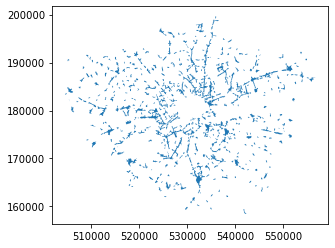

In [129]:
GLA.plot()

<AxesSubplot:>

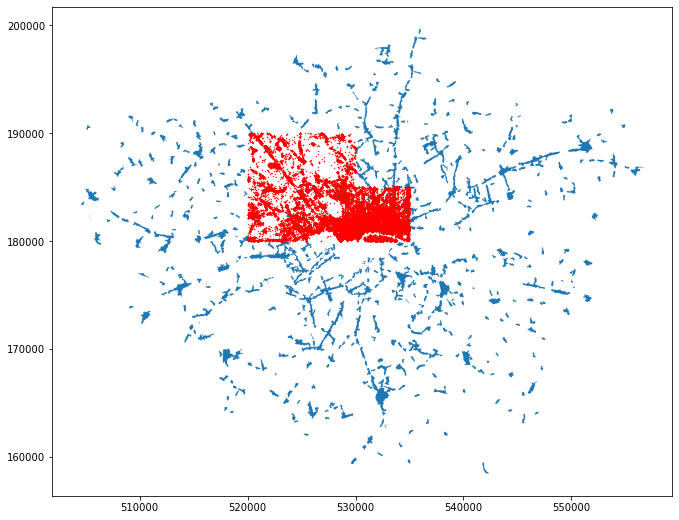

In [130]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


GLA.plot(ax=ax)
LondonPs.plot(color= "red", markersize=0.2, ax=ax)

In [131]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [132]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )

print('Done.')

Found data/geo/Boroughs.gpkg locally!
Done.


<AxesSubplot:>

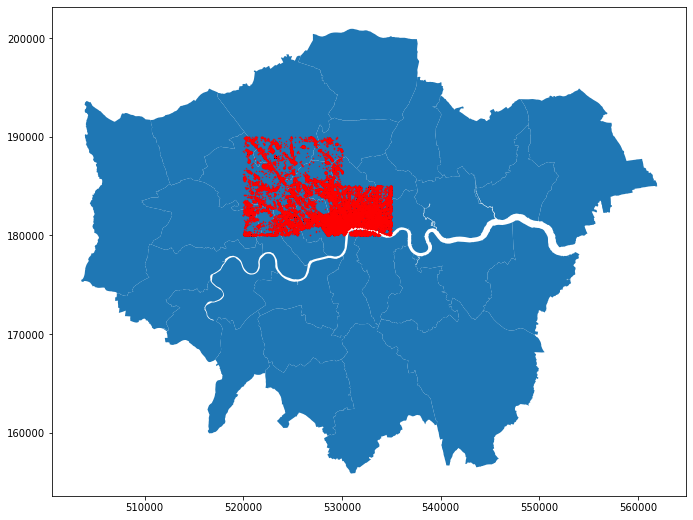

In [133]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


boros.plot(ax=ax)
LondonPs.plot(color= "red", markersize=0.2, ax=ax)

In [134]:
LondonHS = gpd.clip(LondonPs, GLA)

In [135]:
LondonHS

,rates_code,rates_authority_id,rates_authority,region,location_code,address_no,address_street,address_town,pc__pcs,use_category,...,status,status_date,status_duration,ratepayers_published,VOA_CT_RECORD,VOA_NDR_RECORD,X_COORDINATE,Y_COORDINATE,ADMINISTRATIVE_AREA,geometry
2731,00106010210012,E09000003,Barnet,Outer London - West and North West,95580063,GND F 102,CRICKLEWOOD BROADWAY,LONDON,NW2 3EJ,Shops,...,1.0,2017-04-01,NaN,True,NaN,9.558006e+07,523987.00,185539.00,CAMDEN,POINT (523987.000 185539.000)
2732,00106010210021,E09000003,Barnet,Outer London - West and North West,9705295000,1ST & 2ND FLRS 102,CRICKLEWOOD BROADWAY,LONDON,NW2 3EJ,"Surgeries, Clinics, Health Centres (Rental Val...",...,1.0,2017-04-01,NaN,True,NaN,9.705295e+09,523987.00,185539.00,CAMDEN,POINT (523987.000 185539.000)
2733,001060104G0015,E09000003,Barnet,Outer London - West and North West,112663063,GND FL 104,CRICKLEWOOD BROADWAY,LONDON,NW2 3EJ,Shops,...,1.0,2017-04-01,NaN,True,NaN,1.126631e+08,523982.00,185544.00,CAMDEN,POINT (523982.000 185544.000)
2734,00106010600029,E09000003,Barnet,Outer London - West and North West,677119000,GND F 106,CRICKLEWOOD BROADWAY,LONDON,NW2 3EJ,Shops,...,1.0,2017-04-01,NaN,True,NaN,6.771190e+08,523980.00,185547.00,CAMDEN,POINT (523980.000 185547.000)
2735,00106010820001,E09000003,Barnet,Outer London - West and North West,7337395000,108-110,CRICKLEWOOD BROADWAY,LONDON,NW2 3EJ,Restaurants,...,1.0,2017-04-01,NaN,True,NaN,7.337395e+09,523970.00,185554.00,CAMDEN,POINT (523970.000 185554.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72175,NaN,E09000033,Westminster,Inner London - West,90360082,153A,WESTBOURNE GROVE,LONDON,W11 2RS,Offices (Inc Computer Centres),...,1.0,2017-04-01,NaN,False,NaN,9.036008e+07,525257.00,181080.00,KENSINGTON AND CHELSEA,POINT (525257.000 181080.000)
72192,NaN,E09000033,Westminster,Inner London - West,9638606000,141-145,WESTBOURNE GROVE,LONDON,W11 2RS,Restaurants,...,1.0,2017-04-01,NaN,False,NaN,9.638606e+09,525274.45,181086.34,KENSINGTON AND CHELSEA,POINT (525274.450 181086.340)
72195,NaN,E09000033,Westminster,Inner London - West,348124082,56,GREAT WESTERN ROAD,LONDON,W11 1AB,Showrooms,...,1.0,2017-04-01,NaN,False,NaN,3.481241e+08,524868.00,181864.00,CITY OF WESTMINSTER,POINT (524868.000 181864.000)
72196,NaN,E09000033,Westminster,Inner London - West,348127082,BOOKSTALL ENTRANCE HALL,GREAT WESTERN ROAD,LONDON,W11 1AB,Sales Kiosks,...,1.0,2017-04-01,NaN,False,NaN,3.481271e+08,524920.00,181764.00,CITY OF WESTMINSTER,POINT (524920.000 181764.000)


<AxesSubplot:>

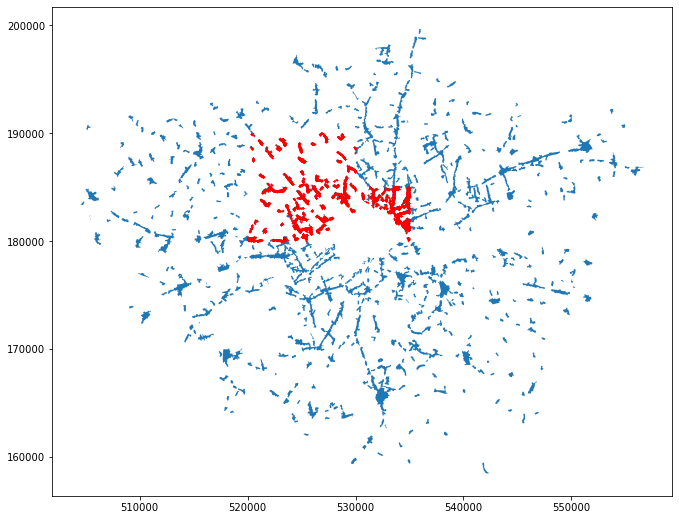

In [136]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


GLA.plot(ax=ax)
LondonHS.plot(color= "red", markersize=0.2, ax=ax)

The OS only sent across the files in which Camden is comprised within